In [1]:
! pip install matplotlib pandas seaborn 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans"
plt.rcParams["font.size"] = 8
sns.set_palette('muted')

URL = 'http://localhost:8081'

# Shot Metadata

This notebook contains a demonstration of plotting several of the summary statistics that accompany the shot metadata. 

Firstly, we're going to load all the shot data into a pandas dataframe:

In [3]:
summary = pd.read_parquet(f'{URL}/parquet/level2/shots')
summary = summary.loc[summary.shot_id <40000]
summary

,context,url,preshot_description,postshot_description,campaign,current_range,divertor_config,plasma_shape,commissioner,facility,...,cpf_vol_ipmax,cpf_vol_max,cpf_vol_truby,cpf_wmhd_ipmax,cpf_wmhd_max,cpf_wmhd_truby,cpf_zeff_ipmax,cpf_zeff_max,cpf_zeff_truby,cpf_zmag_efit
0,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/11766.zarr,\nRELOAD 10232 PLASMA CONDITIONING SHOT FROM M4\n,"\nGOOD PLASMA, RAN FINE. SL JOINT ALARMS RATHE...",M5,None,Conventional,None,None,MAST,...,8.088068,8.478948,NaN,9286.269388,14370.632,NaN,NaN,NaN,NaN,-0.011828
1,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/11767.zarr,\nREPEAT\n,\nOK BUT LOST VERTICAL CONTROL - FA2 JUST DIED...,M5,None,Conventional,None,None,MAST,...,7.707199,8.559942,NaN,7343.788162,11461.490,NaN,NaN,NaN,NaN,-0.007570
2,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/11768.zarr,\nSELECT ALL 4 FAS AND LOAD EFC SETTINGS FROM ...,\nOK. GOT FA4 BUT NOT FA3\n,M5,None,Conventional,None,None,MAST,...,8.300782,8.580827,NaN,10585.928086,12660.081,NaN,NaN,NaN,NaN,-0.011107
3,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/11769.zarr,"\nREPEAT, WITH TF RAISED TO 0.58.\n",\nSLIDING JOINT ALARMS A BIT LOWER. PLASMA OK.\n,M5,None,Conventional,None,None,MAST,...,8.112973,8.742647,NaN,8189.273726,12494.456,NaN,NaN,NaN,NaN,-0.008156
4,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/11771.zarr,\nRELOADED 11769 AND SET UP PLASMA CURRENT FEE...,\nGOOD PLASMA F/B CONTROL. SLIDING JOINT ALARM...,M5,None,Conventional,None,None,MAST,...,7.978917,8.760519,NaN,8206.258460,12345.816,NaN,NaN,NaN,NaN,-0.008726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/30467.zarr,\nRepeat with new neutron camera position.\ncH...,\nTwo times lower DD neutron rate than referen...,M9,700 kA,Conventional,Connected Double Null,None,MAST,...,9.029202,9.046394,NaN,49469.122469,52653.445,NaN,NaN,NaN,NaN,0.013202
11360,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/30468.zarr,\nRepeat with new neutron camera position.\ncH...,\nGood beam.\nGood repeat.\n,M9,700 kA,Conventional,Lower Single Null,None,MAST,...,9.102411,9.107017,NaN,48516.962675,49382.133,NaN,NaN,NaN,NaN,0.012445
11361,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/30469.zarr,\nRepeat with increased beam power (74 kV)\ncH...,\nGood shot. Modes present.\n,M9,700 kA,Conventional,Connected Double Null,None,MAST,...,8.988730,9.047923,NaN,47466.249616,49115.805,NaN,NaN,NaN,NaN,0.015299
11362,"{'dcat': 'http://www.w3.org/ns/dcat#', 'dct': ...",s3://mast/level2/shots/30470.zarr,\nRepeat last using hydrogen in outboard and c...,\nNo HF gas.\n,M9,700 kA,Conventional,None,None,MAST,...,9.687049,10.055509,NaN,17290.432865,22310.516,NaN,NaN,NaN,NaN,0.015164


### Summary Statistics About Shots

Let's look at a summary of simple counts of different shot metadata.

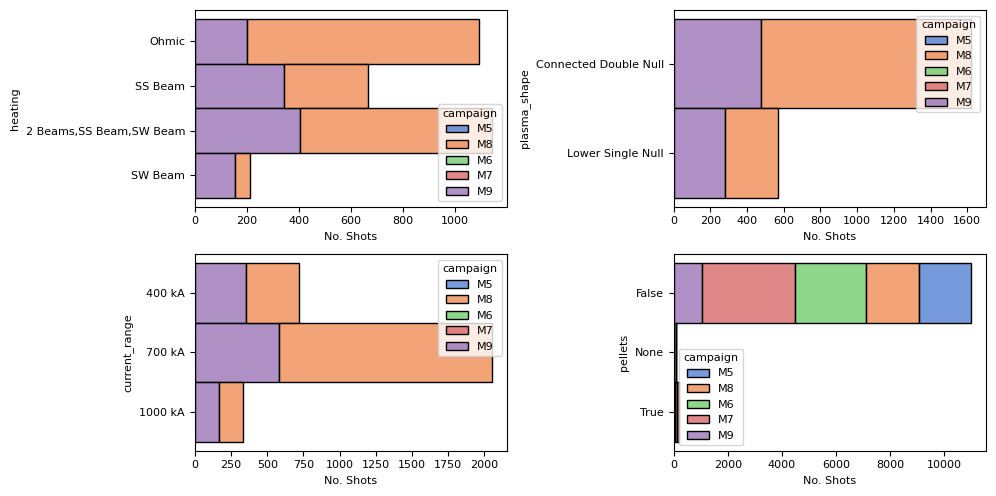

In [4]:

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
ax1, ax2, ax3, ax4 = axes.flatten()

sns.histplot(summary, y='heating', hue='campaign', multiple="stack", ax=ax1)
sns.histplot(summary, y='plasma_shape', hue='campaign', multiple="stack", ax=ax2)
sns.histplot(summary, y='current_range', hue='campaign', multiple="stack", ax=ax3)
sns.histplot(summary, y=summary.pellets.astype(str), hue='campaign', multiple="stack", ax=ax4)

for ax in axes.flatten():
    ax.set_xlabel('No. Shots')

plt.tight_layout()

### Plasma Beta ($\beta$) v.s Confinement Time ($\tau_E$)

This plot can show how the efficiency of energy confinement varies with plasma pressure.

Text(0.5, 0, 'Plasma Beta $\\beta$ (%)')

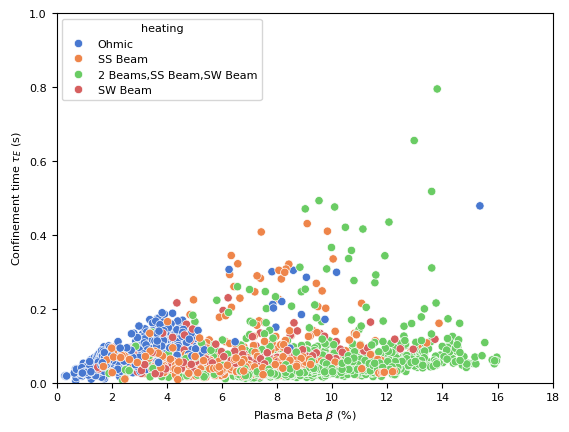

In [5]:
plt.figure()
sns.scatterplot(summary, y='cpf_tautot_max', x='cpf_betmhd_max', hue='heating')
plt.xlim(0, 18)
plt.ylim(0, 1)
# plt.yscale('log')
plt.ylabel('Confinement time $\\tau_E$ (s)')
plt.xlabel('Plasma Beta $\\beta$ (%)')

### Plasma Temperature ($T_e$) vs. Plasma Density ($n_e$)
This can reveal the relationship between temperature and density, which is critical for achieving the conditions necessary for fusion.

Text(0.5, 0, 'Density $n_e$ ($m^{-3}$)')

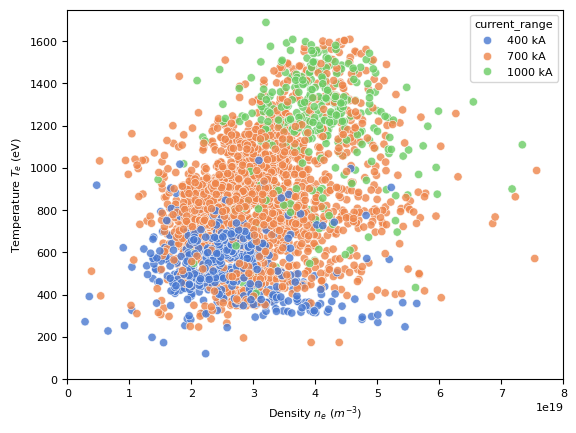

In [6]:
plt.figure()
sns.scatterplot(summary, y='cpf_te0_ipmax', x='cpf_ne0_ipmax', hue='current_range', alpha=0.8)
plt.xlim(0, .8e20)
plt.ylim(0, 1750)
plt.ylabel('Temperature $T_e$ (eV)')
plt.xlabel('Density $n_e$ ($m^{-3}$)')

### Plasma Current ($I_p$) vs. Confinement Time ($\tau_E$)

This can indicate how the plasma current affects the confinement time, providing insights into stability and performance.

Text(0, 0.5, 'Average Plasma Current  $I_p$ (kA)')

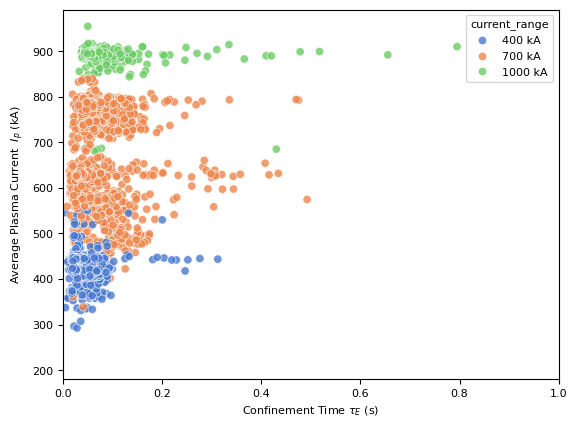

In [7]:
plt.figure()
sns.scatterplot(summary, y='cpf_ip_av', x='cpf_tautot_max', hue='current_range', alpha=0.8)
plt.xlim(0, 1)
plt.xlabel('Confinement Time $\\tau_E$ (s)')
plt.ylabel('Average Plasma Current  $I_p$ (kA)')